### Task 1 
In a new jupyter notebook import:
- pandas, 
- matplotlib.pyplot 
- seaborn
    - _** You will need to install Seaborn if you haven't used it prior. **_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Task 2
Download ux_gender_data.csv from github
- https://github.com/nerdygirlcodes/interactive-data/blob/main/Challenges/ux_gender_data.csv

---
### Task 3 
Using pandas.read_csv() - convert the file to a DataFrame object
- Convert the data to Tidy Data

In [9]:
# read the csv data
ux_data_raw = pd.read_csv('ux_gender_data.csv')

# pivot and clean the data into tidy data standards using 'pandas melt()'
ux_data = pd.melt(
    ux_data_raw, # dataframe being pivoted
    id_vars='year',  # column to be used as main observation variable
    value_vars=['male', 'female'], # column(s) to be pivioted out
    var_name='gender', # name of new pivoted column
    value_name='percent', # name of new value column
)

# set the proper data types
ux_data = ux_data.astype({
    'year': 'category',
    'gender': 'category',
    'percent': 'float'
})

# group the data by year and gender
yg_group = ux_data.groupby(['year', 'gender'])

---
### Task 4
In a new code cell, using Matplotlib, create and show a figure that includes one axis with a stacked horizontal bar plot of the ‘male’ and ‘female’ variables across ‘year’
- Label the axes 'Year' and 'Gender by %'
- Label the figure 'UX Designer by Gender % over Year'
- Have a legend

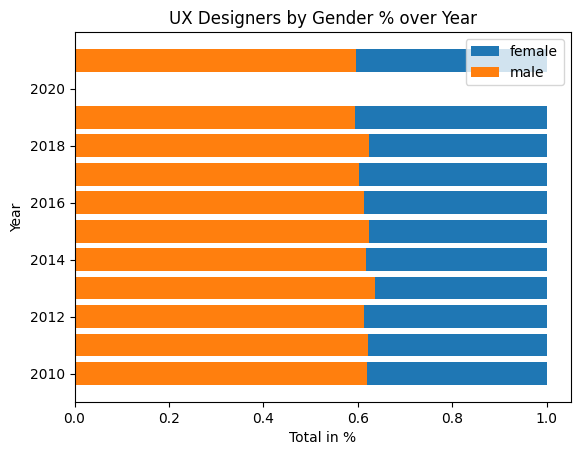

In [23]:
# create a new 
fig_1, ax_1 = plt.subplots()

# loop through the grouped data
for idx, o in yg_group:
    if o.gender.item() == 'male':
        # if male, display as tab:orange and label as male
        ax_1.barh(o.year, o.percent, left=0, label='male', color="tab:orange")
    else:
        # if female, calculate its starting point on the bar
        start_loc = 1 - o.percent
        # start at the calculated offset, display as tab:blue and label as female
        ax_1.barh(o.year, o.percent, left=start_loc, label='female', color="tab:blue")

# setup legend
ax_1.legend(['female','male'])

# set axes labels + title
ax_1.set(xlabel='Total in %', ylabel='Year', title='UX Designers by Gender % over Year')

# display figure
plt.show()

---
### Task 5
In a new code cell, using Seaborn, plot the same data.
- _** We found the easiest option is to use a histogram plot, not a bar plot. **_

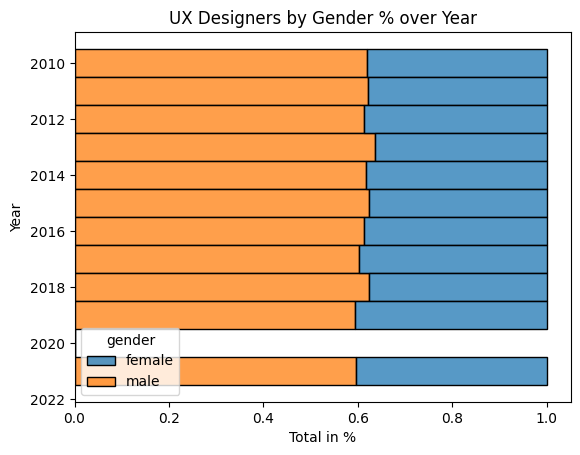

In [24]:
# create a matplotlib figure
fig_2, ax_2 = plt.subplots()

# map the values with a histplot, labels and colors are auto set based on 'hue'
sns.histplot(ux_data, y='year', hue='gender', weights='percent', multiple='stack')

# set axes labels + title
ax_2.set(xlabel='Total in %', ylabel='Year', title='UX Designers by Gender % over Year')

# display figure
plt.show()